In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = "data/monitoring/"

In [2]:
def bytes2human(n):
    # http://code.activestate.com/recipes/578019
    # >>> bytes2human(10000)
    # '9.8K'
    # >>> bytes2human(100001221)
    # '95.4M'
    symbols = ('K', 'M', 'G', 'T', 'P', 'E', 'Z', 'Y')
    prefix = {}
    for i, s in enumerate(symbols):
        prefix[s] = 1 << (i + 1) * 10
    for s in reversed(symbols):
        if n >= prefix[s]:
            value = float(n) / prefix[s]
            return '%.1f%s' % (value, s)
    return "%sB" % n

In [4]:
df = pd.read_csv(data + "20226_output.csv", header=0, index_col=0)
df.shape

(68782, 19)

In [24]:
df.head()

,pid,p_status,p_cpu_percent,p_mem_percent,p_mem_rss,p_mem_vms,p_mem_shared,p_mem_uss,p_mem_pss,p_mem_swap,s_mem_total,s_mem_available,s_mem_used,s_mem_free,s_swap_total,s_swap_used,s_swap_free,s_swap_percent,s_cpu_percent
ts,,,,,,,,,,,,,,,,,,,
2019-04-18 08:42:28.002845,20226,sleeping,0.0,0.603895,100524032,534327296,27947008,92991488,95214592,0,16645955584,12640677888,3621978112,232783872,2147479552,1365299200,782180352,63.6,10.5
2019-04-18 08:42:33.002845,20226,sleeping,0.0,0.603895,100524032,534327296,27947008,92991488,95214592,0,16645955584,12640608256,3622043648,232636416,2147479552,1365299200,782180352,63.6,4.2
2019-04-18 08:42:38.002845,20226,sleeping,0.0,0.603895,100524032,534327296,27947008,92991488,95211520,0,16645955584,12639825920,3622854656,231686144,2147479552,1365299200,782180352,63.6,4.3
2019-04-18 08:42:43.002845,20226,sleeping,0.0,0.603895,100524032,534327296,27947008,92991488,95211520,0,16645955584,12639666176,3623002112,231526400,2147479552,1365299200,782180352,63.6,4.2
2019-04-18 08:42:48.002845,20226,sleeping,4.2,0.650155,108224512,549871616,29061120,100728832,102969344,0,16645955584,12633399296,3629264896,207228928,2147479552,1365299200,782180352,63.6,5.0


In [61]:
bytes2human(df['p_mem_rss'].mean())

'692.7M'

In [66]:
df[df['p_mem_rss'] >= 6000000000]

,pid,p_status,p_cpu_percent,p_mem_percent,p_mem_rss,p_mem_vms,p_mem_shared,p_mem_uss,p_mem_pss,p_mem_swap,s_mem_total,s_mem_available,s_mem_used,s_mem_free,s_swap_total,s_swap_used,s_swap_free,s_swap_percent,s_cpu_percent
ts,,,,,,,,,,,,,,,,,,,
2019-04-22 01:15:23.002845,20226,running,99.8,36.285991,6012846080,6457126912,28815360,6007955456,6010213376,0,16645955584,6073155584,10184441856,161931264,2147479552,876503040,1270976512,40.8,8.5
2019-04-22 01:15:53.002845,20226,running,100.0,36.139484,6015762432,6457131008,28815360,6008090624,6010354688,0,16645955584,6099906560,10157559808,295456768,2147479552,876548096,1270931456,40.8,8.8
2019-04-22 01:15:58.002845,20226,running,100.2,36.139484,6015762432,6457131008,28815360,6008090624,6010354688,0,16645955584,6099759104,10157838336,295690240,2147479552,876548096,1270931456,40.8,8.8
2019-04-22 01:16:03.002845,20226,running,99.8,36.139484,6015762432,6457131008,28815360,6008090624,6010354688,0,16645955584,6100021248,10157563904,295944192,2147479552,876548096,1270931456,40.8,8.5
2019-04-22 01:16:08.002845,20226,running,100.0,36.139484,6015762432,6457131008,28815360,6008090624,6010354688,0,16645955584,6100160512,10157395968,295976960,2147479552,876548096,1270931456,40.8,8.7
2019-04-22 01:16:13.002845,20226,running,100.1,36.139484,6015762432,6457131008,28815360,6008090624,6010354688,0,16645955584,6100066304,10157518848,295849984,2147479552,876548096,1270931456,40.8,8.7
2019-04-22 01:16:18.002845,20226,running,99.7,36.139484,6015762432,6457131008,28815360,6008090624,6010354688,0,16645955584,6100430848,10157158400,296185856,2147479552,876548096,1270931456,40.8,8.7
2019-04-22 01:16:23.002845,20226,running,100.0,36.139484,6015762432,6457131008,28815360,6008090624,6010354688,0,16645955584,6100307968,10157293568,296034304,2147479552,876548096,1270931456,40.8,8.8
2019-04-22 01:16:28.002845,20226,running,100.0,36.286926,6040305664,6481674240,28815360,6032633856,6034897920,0,16645955584,6075379712,10182197248,271097856,2147479552,876548096,1270931456,40.8,8.5


In [30]:
list(df.columns)

['pid',
 'p_status',
 'p_cpu_percent',
 'p_mem_percent',
 'p_mem_rss',
 'p_mem_vms',
 'p_mem_shared',
 'p_mem_uss',
 'p_mem_pss',
 'p_mem_swap',
 's_mem_total',
 's_mem_available',
 's_mem_used',
 's_mem_free',
 's_swap_total',
 's_swap_used',
 's_swap_free',
 's_swap_percent',
 's_cpu_percent']

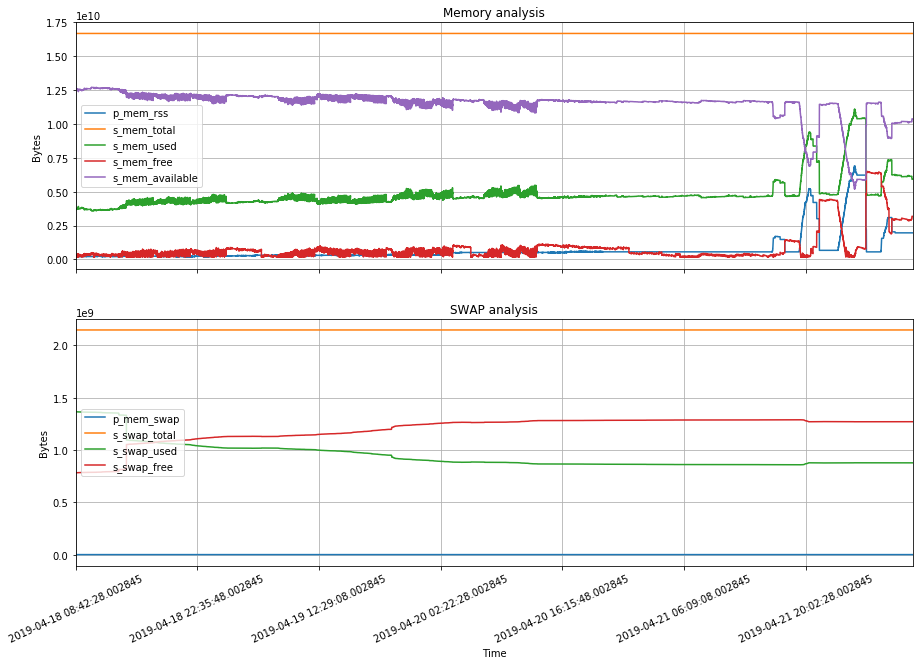

In [68]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,10),)

ax11= ax[0]
ax21= ax[1]

to_show= ['p_mem_rss',
 's_mem_total',
 's_mem_used',
 's_mem_free',
 's_mem_available']

to_show_swap= ['p_mem_swap',
 's_swap_total',
 's_swap_used',
 's_swap_free']

df[to_show].plot(ax=ax11)
ax11.set_ylabel('Bytes')
ax11.set_xlabel('')
ax11.set_title("Memory analysis")
ax11.grid()
ax11.set_xticklabels([])

df[to_show_swap].plot(ax=ax21)
ax21.set_ylabel('Bytes')
ax21.set_xlabel('Time')
ax21.set_title("SWAP analysis")
ax21.grid()
plt.legend(loc='center left')
plt.xticks(rotation=25)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25)

In [18]:
df.iloc[-1]

pid                      20226
p_status               running
p_cpu_percent             99.9
p_mem_percent           11.768
p_mem_rss           1958899712
p_mem_vms           2400268288
p_mem_shared          28815360
p_mem_uss           1951227904
p_mem_pss           1953494016
p_mem_swap                   0
s_mem_total        16645955584
s_mem_available    10350149632
s_mem_used          5911560192
s_mem_free          3170529280
s_swap_total        2147479552
s_swap_used          877084672
s_swap_free         1270394880
s_swap_percent            40.8
s_cpu_percent              8.5
Name: 2019-04-22 08:14:13.002845, dtype: object

In [17]:
df.iloc[1]

pid                      20226
p_status              sleeping
p_cpu_percent                0
p_mem_percent         0.603895
p_mem_rss            100524032
p_mem_vms            534327296
p_mem_shared          27947008
p_mem_uss             92991488
p_mem_pss             95214592
p_mem_swap                   0
s_mem_total        16645955584
s_mem_available    12640608256
s_mem_used          3622043648
s_mem_free           232636416
s_swap_total        2147479552
s_swap_used         1365299200
s_swap_free          782180352
s_swap_percent            63.6
s_cpu_percent              4.2
Name: 2019-04-18 08:42:33.002845, dtype: object